<div class="alert alert-block alert-info">
<h1> Comparative statics analysis </h1></div>

In [6]:
import pickle as pkl

from dicts_ambiguity_levels import dense_ambiguity_levels
from dicts_ambiguity_levels import spread_ambiguity_levels
from analysis_comparative_statics import effect_ambiguity_experiences_kw97
from analysis_comparative_statics import plot_effect_ambiguity_choiceshare_kw97
from analysis_comparative_statics import eu_loss_ambiguity
from analysis_comparative_statics import effect_ambiguity_ts_experiences_kw97

%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

<div class="alert alert-block alert-success"> 
<u><b>Get simulated models</b></u></div>

The **comparative statics analysis** is based on simulated models for different levels of ambiguity $\eta$. The quantities of interest are changes in experience within the different occupation.

We load the simulated models for both ambiguity grids. Additionally, we initialize the initial years of schooling and the number of periods in the KW97 framework.

In [12]:
print(
    "Simulated ambiguity levels: \n",
    list(dense_ambiguity_levels.values()),
    "\n",
    list(spread_ambiguity_levels.values()),
    ".",
)

Simulated ambiguity levels: 
 ['dense', 0.0, 0.01, 0.02, 0.1, 0.2, 0.5, 1.0, 1.5] 
 ['spread', 0.0, 1.0, 2.0, 3.0, 4.0, 5.0] .


<IPython.core.display.Javascript object>

In [13]:
simulated_dense_ambiguity_models_kw97 = pkl.load(
    open("sim_dense_ambiguity_models_kw97.pkl", "rb")
)
simulated_spread_ambiguity_models_kw97 = pkl.load(
    open("sim_spread_ambiguity_models_kw97.pkl", "rb")
)

initial_years_schooling_kw97 = 10
n_periods_kw97 = 50

<IPython.core.display.Javascript object>

<div class="alert alert-block alert-success"> 
<u><b>Effect ambiguity on average experience</b></u></div>

We investigate the change of average experience obtained in a blue-collar or white-collar occupation, military, school, or at home with respect to an increase in ambiguity.

<u><b>low ambiguity levels</b></u>

To do: need to do a simulation with vdense ambiguity levels to assess the change correctly.

<u><b>high ambiguity levels</b></u>



In [7]:
effect_ambiguity_experiences_kw97(
    simulated_dense_ambiguity_models_kw97,
    initial_years_schooling_kw97,
    n_periods_kw97,
)

,Blue,White,Military,School,Home
0.000,22.392,20.948,0.544,13.126,2.990
0.010,21.930,21.342,0.492,13.230,3.006
0.020,21.796,21.476,0.462,13.268,2.998
0.100,20.638,22.488,0.338,13.520,3.016
0.200,19.264,23.562,0.278,13.834,3.062
0.500,15.842,26.268,0.142,14.598,3.150
1.000,14.018,27.630,0.064,15.088,3.200
1.500,13.098,28.210,0.048,15.416,3.228


<IPython.core.display.Javascript object>

In [8]:
effect_ambiguity_experiences_kw97(
    simulated_spread_ambiguity_models_kw97,
    initial_years_schooling_kw97,
    n_periods_kw97,
)

,Blue,White,Military,School,Home
0.000,22.392,20.948,0.544,13.126,2.990
1.000,14.018,27.630,0.064,15.088,3.200
2.000,12.890,28.214,0.032,15.582,3.282
3.000,13.258,27.616,0.046,15.680,3.400
4.000,13.632,27.098,0.038,15.746,3.486
5.000,14.120,26.492,0.074,15.774,3.540


<IPython.core.display.Javascript object>

We complement our preceding analysis by visualising the share of individuals that are in a certain occupation at a given point in time $t$. For purpose of a cleaner illustration we select subsets of ambiguity levels `dense_al_selected` and `spread_al_selected`. 

The arguments of the function **`plot_effect_ambiguity_choiceshare_kw97(args)`** are a dictionary of simulated ambiguity models and the coressponding list of selected ambiguity levels. A string can be passed to add an identifier to the file name. The plot will be saved as `.pdf` in the current directory.

**Note:** The selected ambiguity levels have to be a subset of the simulated ambiguity models, e.g. a subset of `dense_ambiguity_levels` and `spread_ambiguity_levels`, respectively.

In [14]:
dense_al_selected = ["0.000", "0.020", "0.200", "0.500"]
spread_al_selected = ["1.000", "2.000", "3.000", "4.000"]

<IPython.core.display.Javascript object>

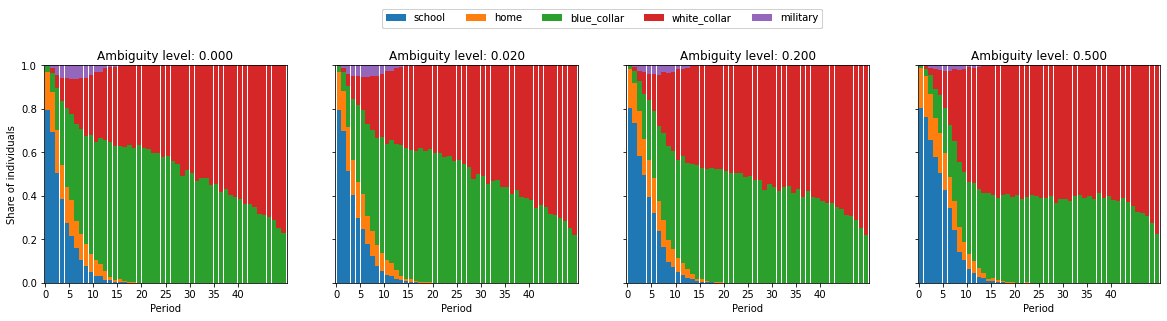

<IPython.core.display.Javascript object>

In [15]:
plot_effect_ambiguity_choiceshare_kw97(
    simulated_dense_ambiguity_models_kw97, dense_al_selected, "dense"
)

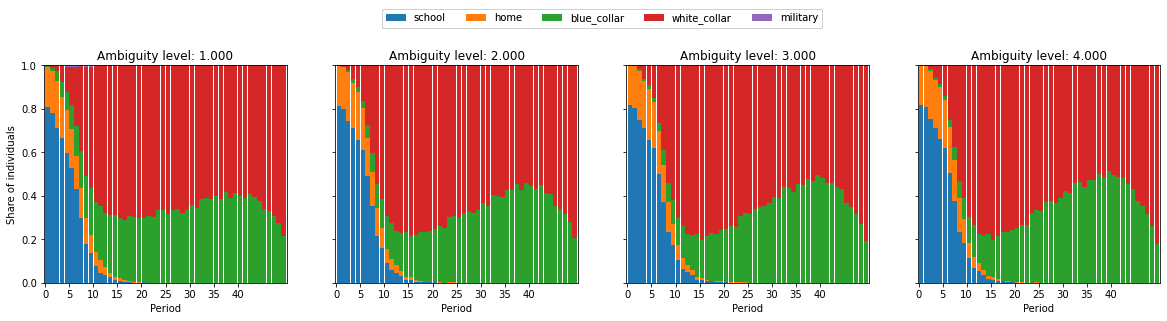

<IPython.core.display.Javascript object>

In [16]:
plot_effect_ambiguity_choiceshare_kw97(
    simulated_spread_ambiguity_models_kw97, spread_al_selected, "spread"
)

<div class="alert alert-block alert-success"> 
<u><b>Effect ambiguity on expected utility</b></u></div>

We will investigate how a change in **ambiguity translates into changes of expected utility**. Depending on the framework of investigation (in our case KW97) it is necessary to specify the indexes of all value functions in the model.

In [18]:
# Indexes of the value functions for the kw97 model
indexes_value_func_kw97 = [
    "Value_Function_School",
    "Value_Function_Military",
    "Value_Function_White_Collar",
    "Value_Function_Blue_Collar",
    "Value_Function_Home",
]

<IPython.core.display.Javascript object>

The function **`eu_loss_ambiguity`** calculates for each simulated ambiguity model the maximum expected utility as average of the individual maximum expected utilities. In particular, for each individual decision-maker $i \in \{1, \dots, N \}$ the maximum value of $v_1^{\pi^*}(s_1)$ will be retrieved. 
The expected utility under a model $\mathcal{M}(\theta; \eta)$ with given ambigiuty level $\eta = a$  is given by:
$$ \text{EU}_{\eta = a} \equiv \sum_{i=1}^N \frac{1}{N} v_{i1}^{\pi_i^*}(s_{i1}). $$

The expected utility loss is defined as 
$$ \text{EU_loss}_{\eta = a} \equiv \left| \frac{ \text{EU}_{\eta = 0} - \text{EU}_{\eta = a}}{\text{EU}_{\eta = 0}} \right|, $$

where $\text{EU}_{\eta = a}$ denotes the expected utiliy under a model with ambiguity level $\eta = a$, and $\text{EU}_{\eta = 0}$ denotes the expected utility derived in a risk-only model.

In [19]:
eu_loss_ambiguity(
    simulated_dense_ambiguity_models_kw97, indexes_value_func_kw97
)

,EU,EU_loss
0.000,104083.061539,0.000000
0.010,107263.832265,0.030560
0.020,108700.578816,0.044364
0.100,115519.629049,0.109879
0.200,121410.303764,0.166475
0.500,134985.448995,0.296901
1.000,153050.579900,0.470466
1.500,168628.019878,0.620129


<IPython.core.display.Javascript object>

<div class="alert alert-block alert-success"> 
<u><b>Let ambiguity and tuitions subsidies in!</b></u></div>

We add a layer to the analysis above, i.e. we analyze the effect of a **tuition subsidy** under different ambiguity settings. Together with the preceding insights we can determine the cross-effect of a tuition subsidy for economic environments that are characterized by a different level of ambiguity.

The **comparative statics analysis** is based on simulated models for different levels of ambiguity $\eta$ *and* different amount of tuition subsidies $ts$. The quantity of interest is the changes of schooling for a given ambiguity level and differen tuition subsidies. 

We load the simulated ambiguity_ts models and specifiy the tuition subsidies under consideration. Note that we can only investigate tuition subsidies under which the models were simulated. In our case we will investigate the change from no tuition subsidiy $ts = 0$ to a subsidy of $\$ 1000$, $ts = 1000$.

In [23]:
simulated_dense_ambiguity_ts_models_kw97 = pkl.load(
    open("sim_dense_ambiguity_ts_models_kw97.pkl", "rb")
)
simulated_spread_ambiguity_ts_models_kw97 = pkl.load(
    open("sim_spread_ambiguity_ts_models_kw97.pkl", "rb")
)

initial_years_schooling_kw97 = 10
n_periods_kw97 = 50
tuition_subsidies = list(
    simulated_dense_ambiguity_ts_models_kw97["0.000"].keys()
)
print("Tuition subsidies to be considered:", tuition_subsidies, ".")

Tuition subsidies to be considered: ['0', '1000'] .


<IPython.core.display.Javascript object>

Passing a dictionary of ambiguity levels, a list of tuition subsidies, a dictionary that constaints the simulated ambiguity_ts models, and model parameters, the function **`effect_ambiguity_ts_experiences_kw97`** calculates the average experience in each occupation. 

In [24]:
effect_ambiguity_ts_experiences_kw97(
    dense_ambiguity_levels,
    tuition_subsidies,
    simulated_dense_ambiguity_ts_models_kw97,
    initial_years_schooling_kw97,
    n_periods_kw97,
)

Blue   White  Military  School   Home
0.000 0     22.551  20.846     0.552  13.076  2.975
      1000  14.422  27.632     0.114  14.715  3.117
0.010 0     22.107  21.247     0.489  13.177  2.980
      1000  14.070  27.934     0.082  14.817  3.097
0.020 0     21.965  21.364     0.477  13.222  2.972
      1000  13.822  28.121     0.081  14.880  3.096
0.100 0     21.014  22.151     0.397  13.458  2.980
      1000  12.857  28.867     0.065  15.135  3.076
0.200 0     19.669  23.192     0.348  13.772  3.019
      1000  12.244  29.315     0.049  15.310  3.082
0.500 0     16.500  25.718     0.203  14.473  3.106
      1000  11.424  29.877     0.016  15.595  3.088
1.000 0     14.076  27.629     0.059  15.074  3.162
      1000  11.168  29.921     0.009  15.814  3.088
1.500 0     13.085  28.272     0.031  15.398  3.214
      1000  11.341  29.615     0.009  15.909  3.126

<IPython.core.display.Javascript object>

In [26]:
effect_ambiguity_ts_experiences_kw97(
    spread_ambiguity_levels,
    tuition_subsidies,
    simulated_spread_ambiguity_ts_models_kw97,
    initial_years_schooling_kw97,
    n_periods_kw97,
)

Blue   White  Military  School   Home
0.000 0     22.551  20.846     0.552  13.076  2.975
      1000  14.422  27.632     0.114  14.715  3.117
1.000 0     14.076  27.629     0.059  15.074  3.162
      1000  11.168  29.921     0.009  15.814  3.088
2.000 0     12.926  28.231     0.024  15.558  3.261
      1000  11.670  29.196     0.008  15.952  3.174
3.000 0     13.283  27.647     0.030  15.664  3.376
      1000  12.421  28.322     0.018  15.990  3.249
4.000 0     13.697  27.102     0.032  15.718  3.451
      1000  12.908  27.720     0.014  16.026  3.332
5.000 0     14.178  26.507     0.065  15.740  3.510
      1000  13.497  27.040     0.050  16.036  3.377

<IPython.core.display.Javascript object>

<div class="alert alert-block alert-warning"> 
<u><b>Let ambiguity and tuitions subsidies in!</b></u></div>

- `dict_ambiguity_levels`   
dictionary that contains a name (first entry) along with specified ambiguity levels
- `simulated_ambiguity_model`   
pd.DataFrame with the simulated decisions of the agents given by the model $\mathcal{M}(\theta)$
- `dict_simulated_ambiguity_models`   
dictionary that contains a `simulated_ambiguity_model` for each ambiguity level specified in `dict_ambiguity_levels`  
- `df_params`  
pd.DataFrame that contains the desired parametrization of the model $\mathcal{M}(\theta)$
- `dict_options`  
dictionary that contains the options for the simulation of the model